In [3]:
library(tidyverse)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


##### What geom would you use to draw 
Aline chart? geom_line()   
A boxplot? geom_boxplot()  
A histogram? geom_histogram()  
An area chart? geom_area()

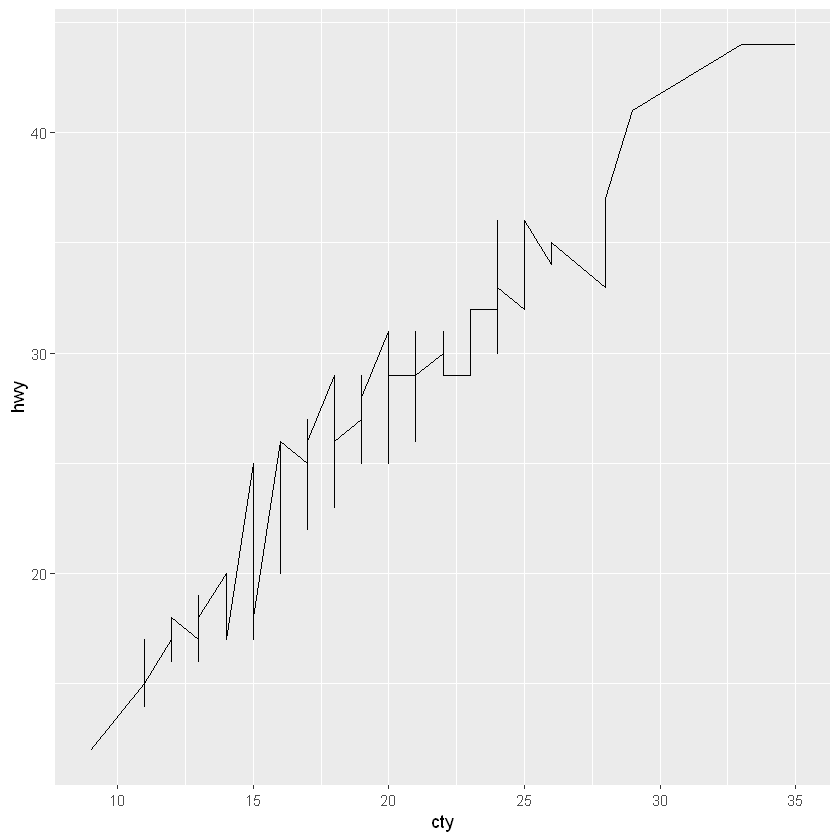

In [6]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy,)) + 
  geom_line()

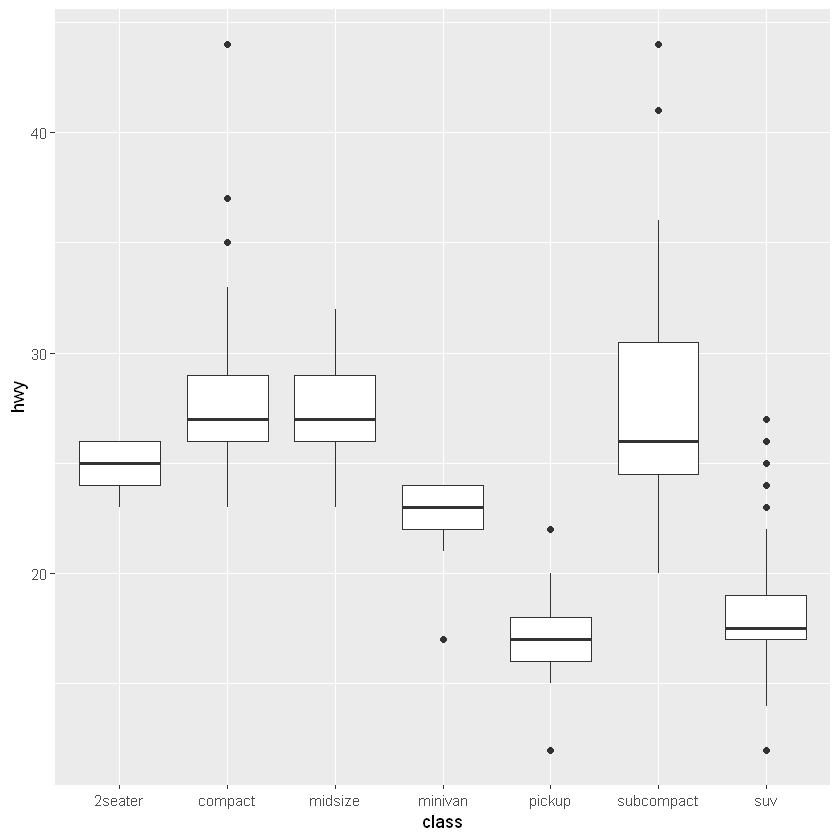

In [20]:
ggplot(data=mpg, mapping=aes(x=class, y=hwy)) +
  geom_boxplot()

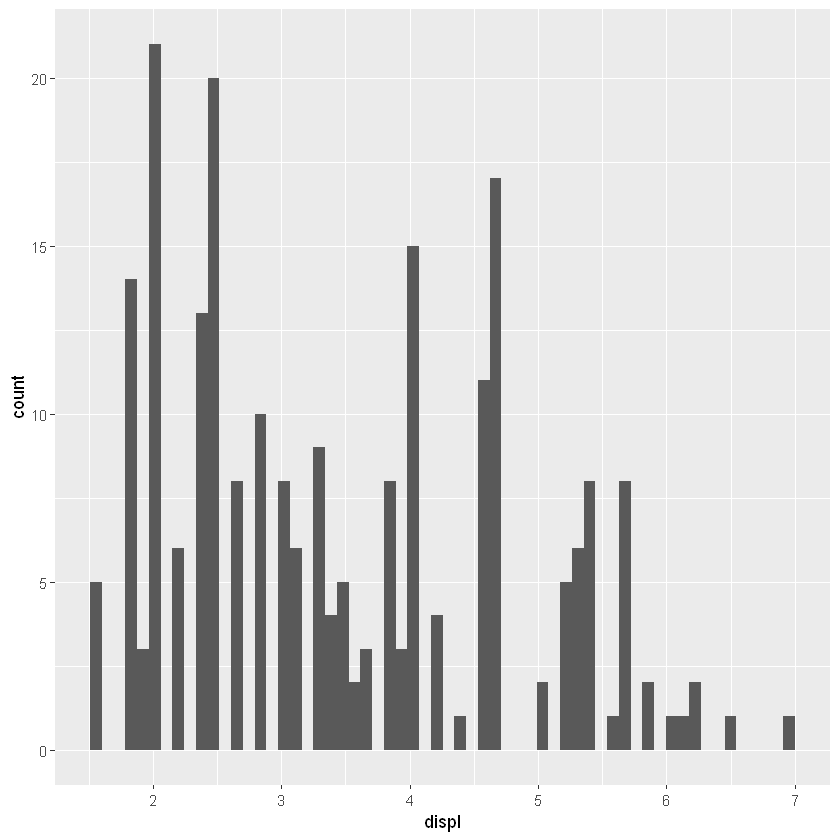

In [22]:
ggplot(data=mpg, mapping=aes(x=displ)) +
  geom_histogram(bins = 60)

Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


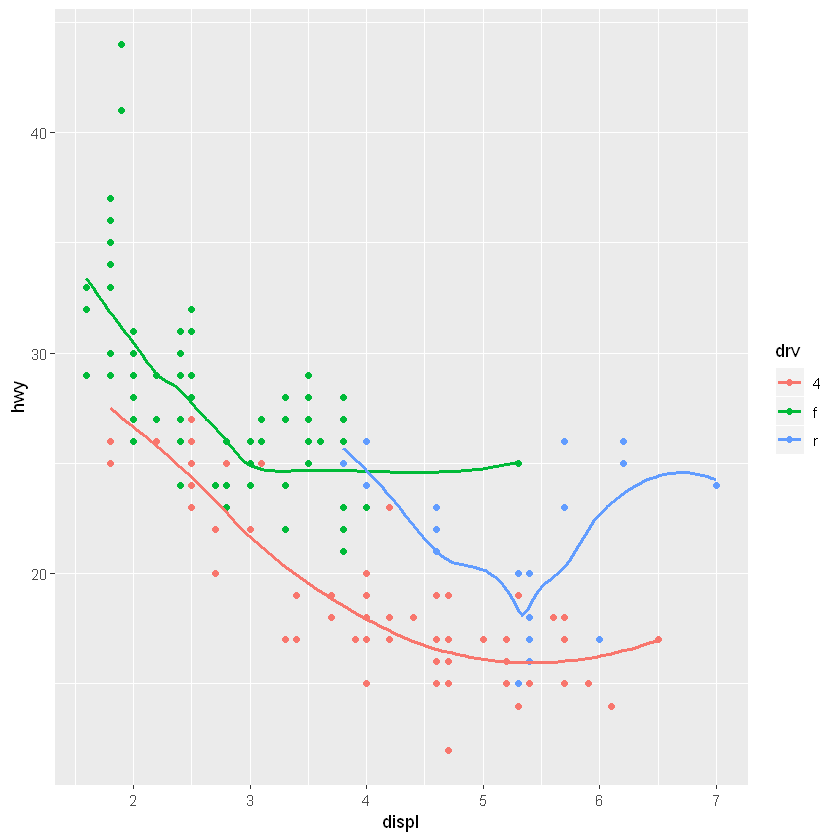

In [9]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point() + 
  geom_smooth(se = FALSE)

What does show.legend = FALSE do? _It hides the legend that s automatically created when a variable is mapped to an aesthetic like color or size._
What happens if you remove it? _The legend will be displayed since the default = TRUE_
Why do you think I used it earlier in the chapter

What does the se argument to geom_smooth() do? _It shows or hides the confidence interval_

Will these two graphs look different? Why/why not? - 
The two charts don't look different because the code is the same only that with the first code, the aesthetic mappings are done on the global ggplot which will apply to each geom.
While the second code the aesthetic mappings are placed in each geom

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


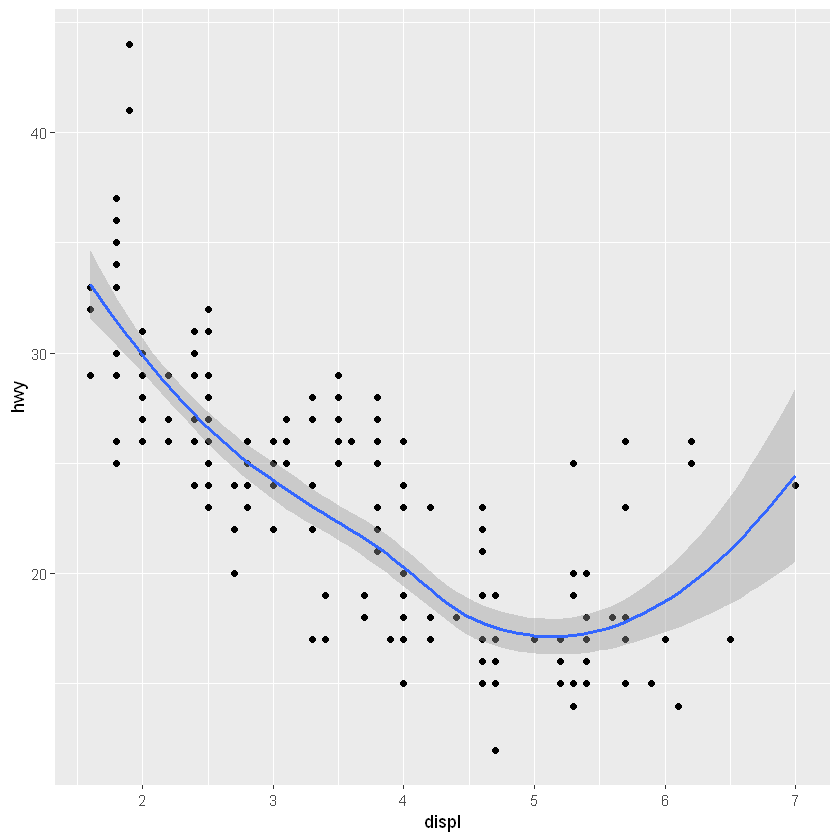

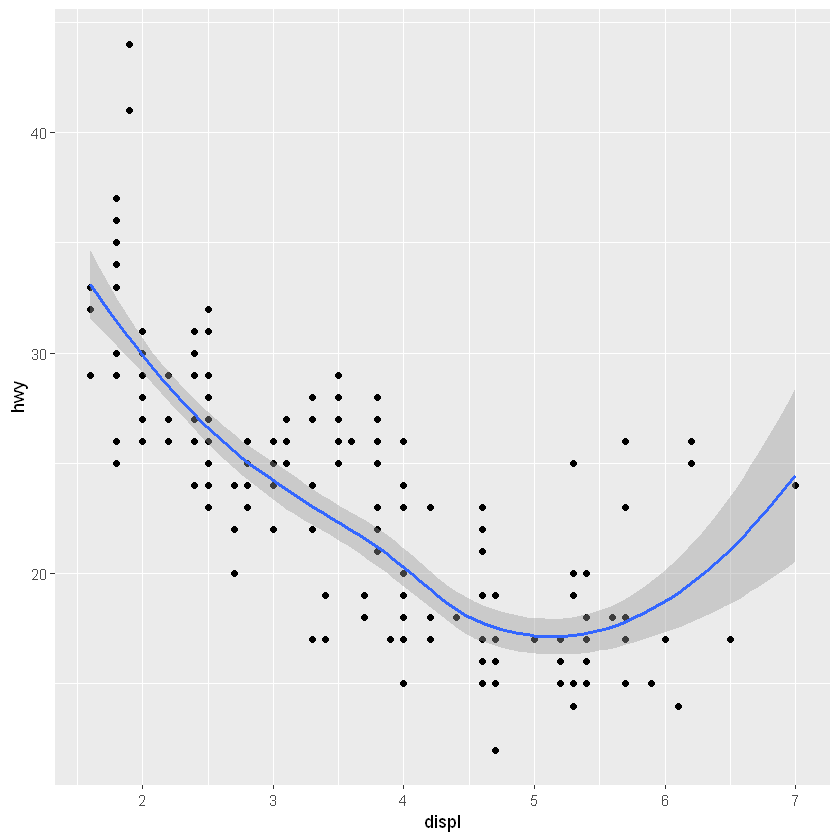

In [45]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()
ggplot() + 
  geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))

Recreate the R code necessary to generate the following graphs.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


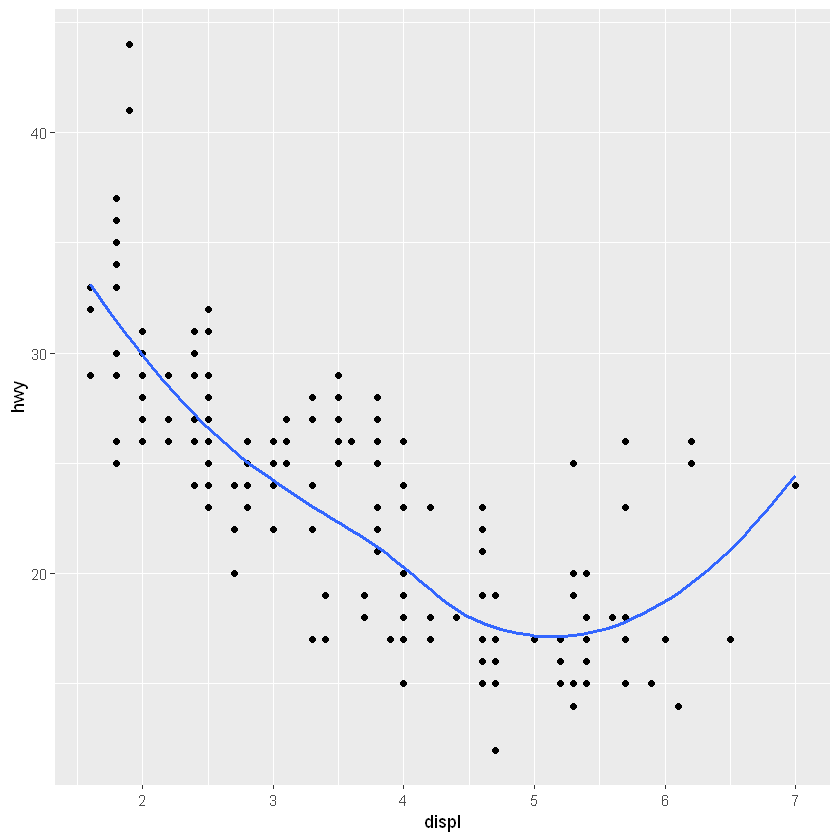

In [48]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth(se=FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


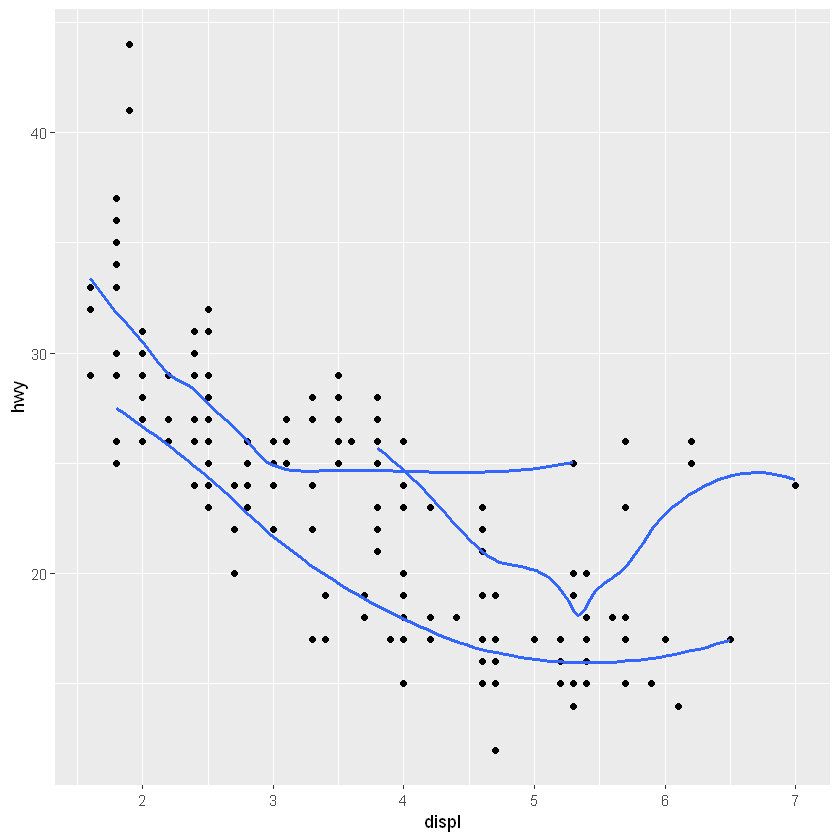

In [49]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth(aes(group = drv), se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


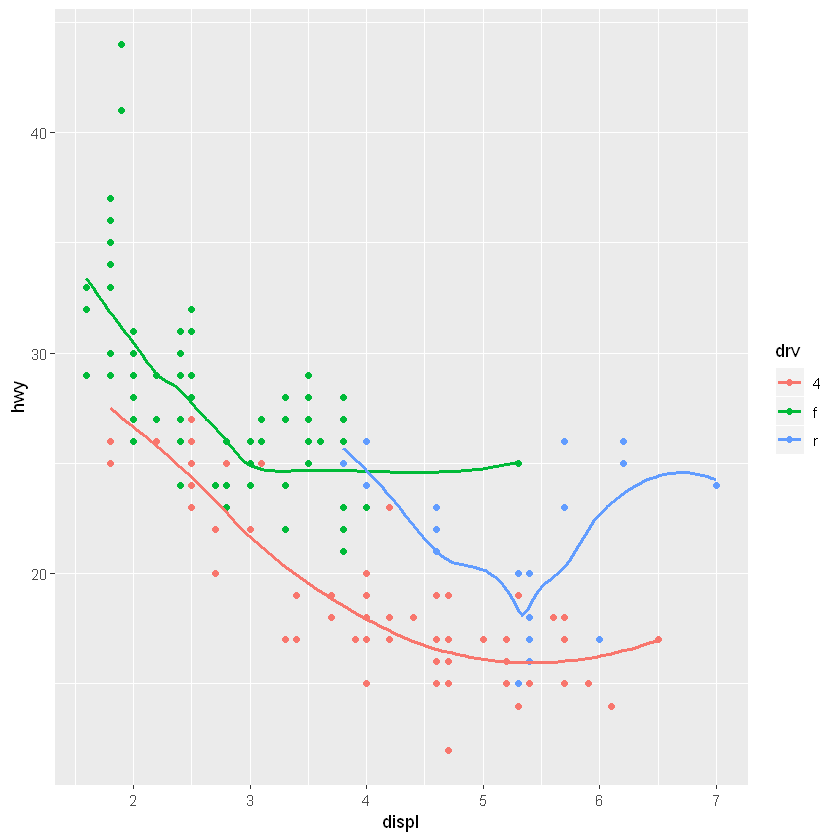

In [50]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point() +
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


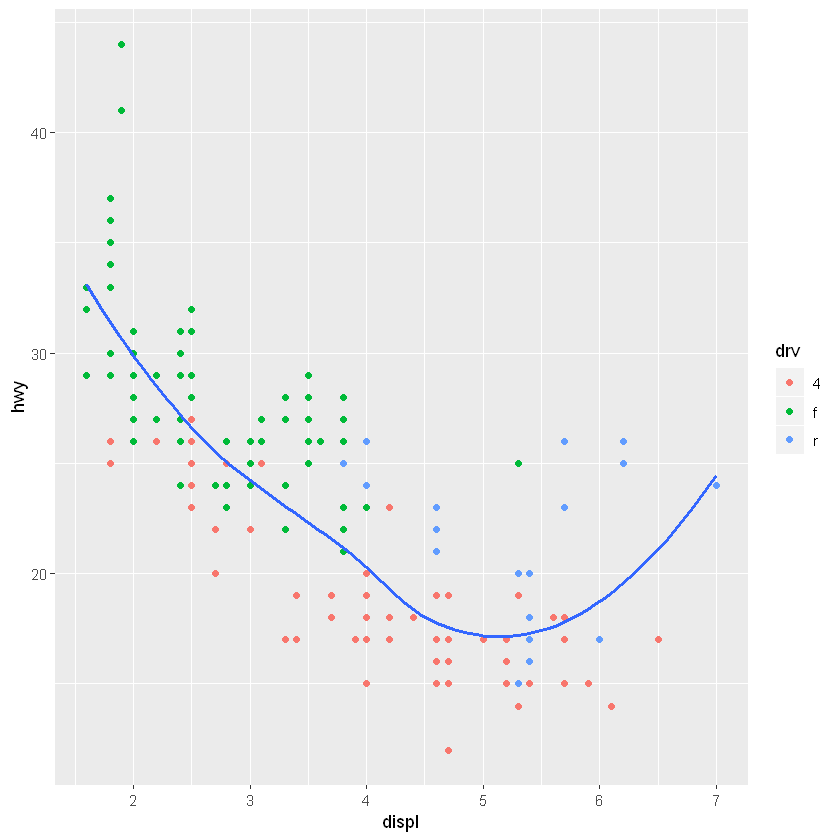

In [51]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(aes(color = drv)) +
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


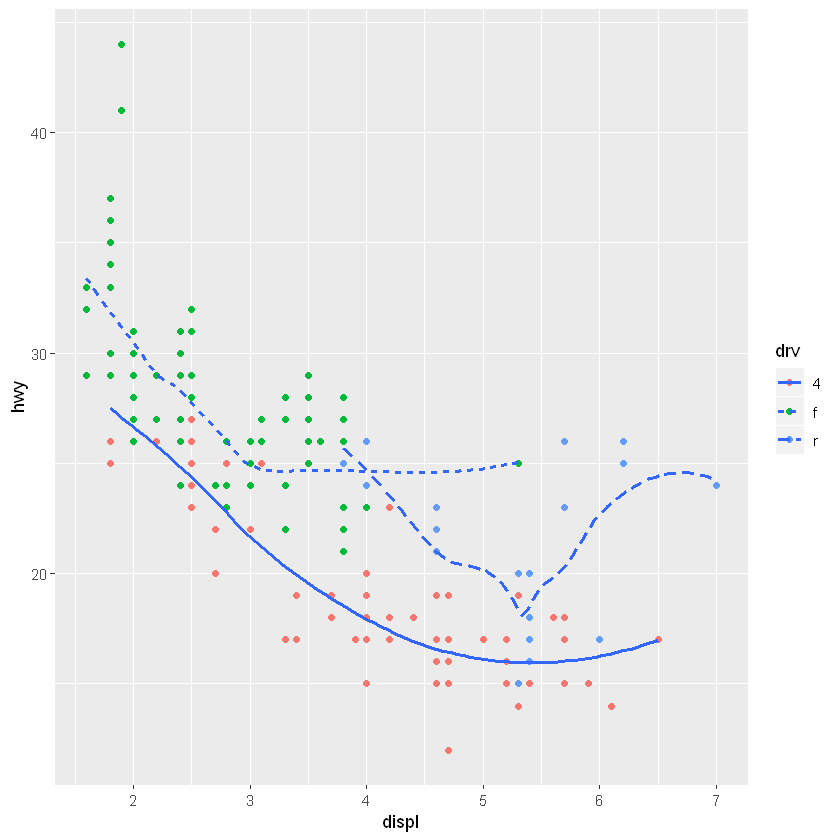

In [52]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(aes(color = drv)) +
  geom_smooth(aes(linetype = drv), se = FALSE)

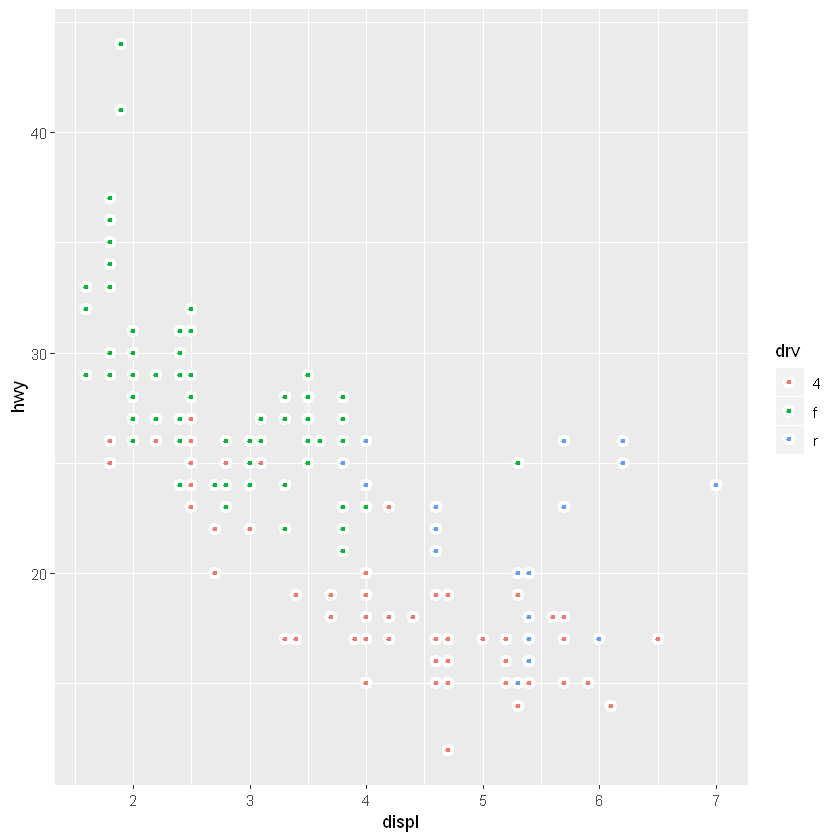

In [53]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(aes(fill = drv), shape = 21, stroke = 2, color = "white") 

What is the default geom associated with stat_summary()? *geom_pointrange()*  
How could you rewrite the previous plot  
ggplot(data = diamonds) +  
  stat_summary(  
    mapping = aes(x = cut, y = depth),  
    fun.ymin = min,  
    fun.ymax = max,  
    fun.y = median  
  )

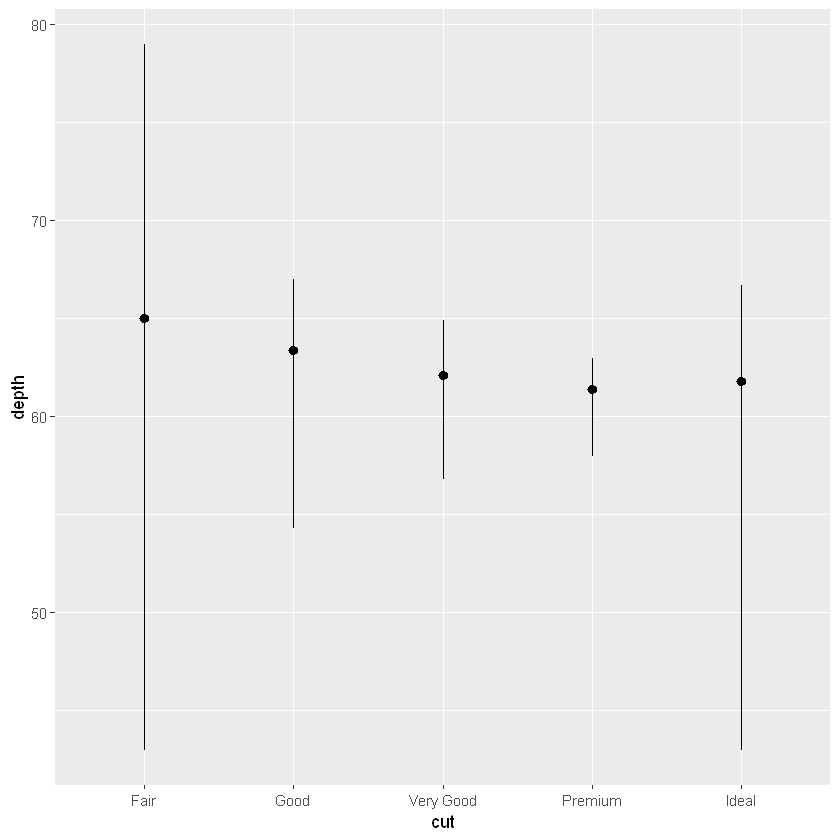

In [10]:
ggplot(data = diamonds) + 
  stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

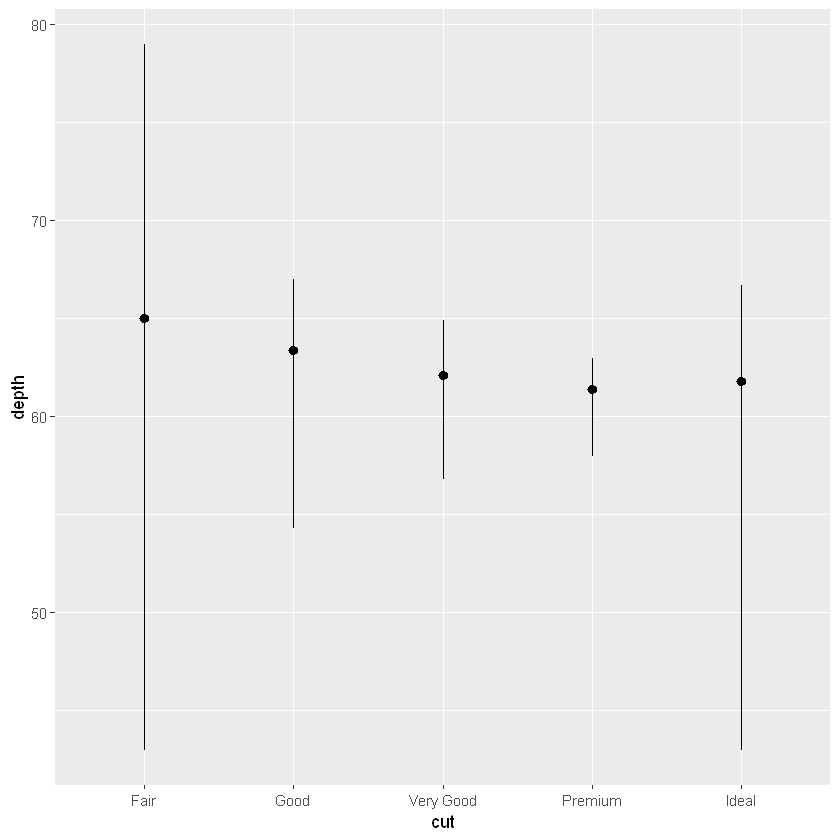

In [15]:
ggplot(data = diamonds) + 
  geom_pointrange(
    mapping = aes(x = cut, y = depth),
    stat = "summary",
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

What does geom_col() do? _geom_col makes the height of the bar proportional to the values of the data_
How is it different to geom_bar()? _Geom_bar makes the height of the bar proportional to the total (sum of values) in each group_  

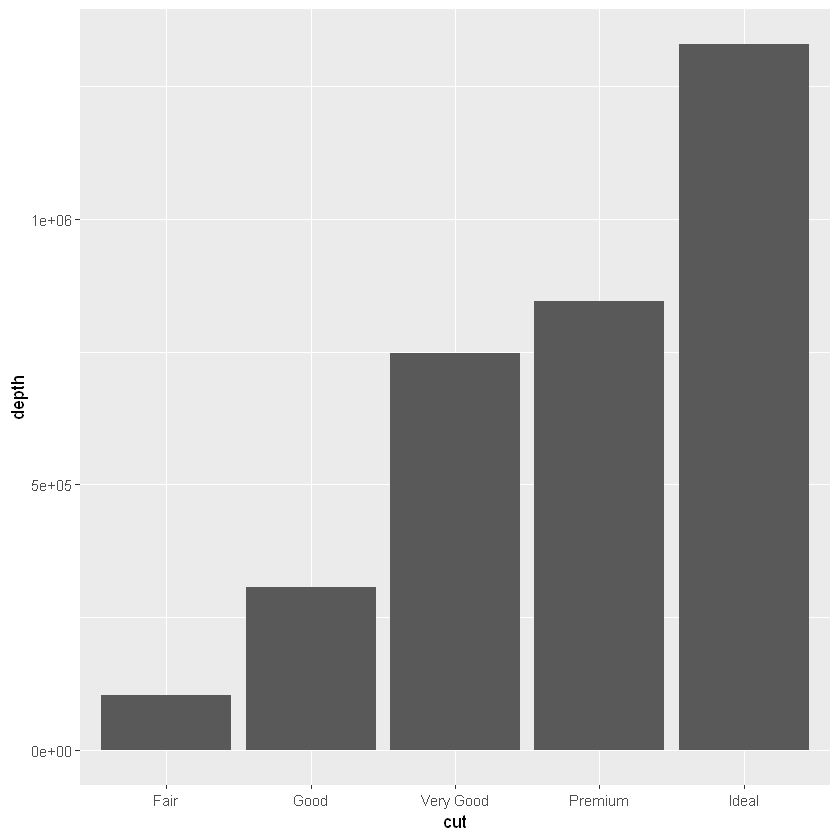

In [24]:
ggplot(data = diamonds) + 
  geom_col(mapping = aes(x = cut, y = depth))


Most geoms and stats come in pairs that are almost always used in concert.  
geom_smooth() and stat_smooth()


What variables does stat_smooth() compute?  
y: predicted valueb  
ymin: lower value of the confidence interval  
ymax: upper value of the confidence interval  
se: standard error  

What parameters control its behaviour?


In our proportion bar chart, we need to set group = 1. Why? _If group is not set to 1, then all the bars have prop == 1. The function geom_bar assumes that the groups are equal to the x values, since the stat computes the counts within the group._

In other words what is the problem with these two graphs?

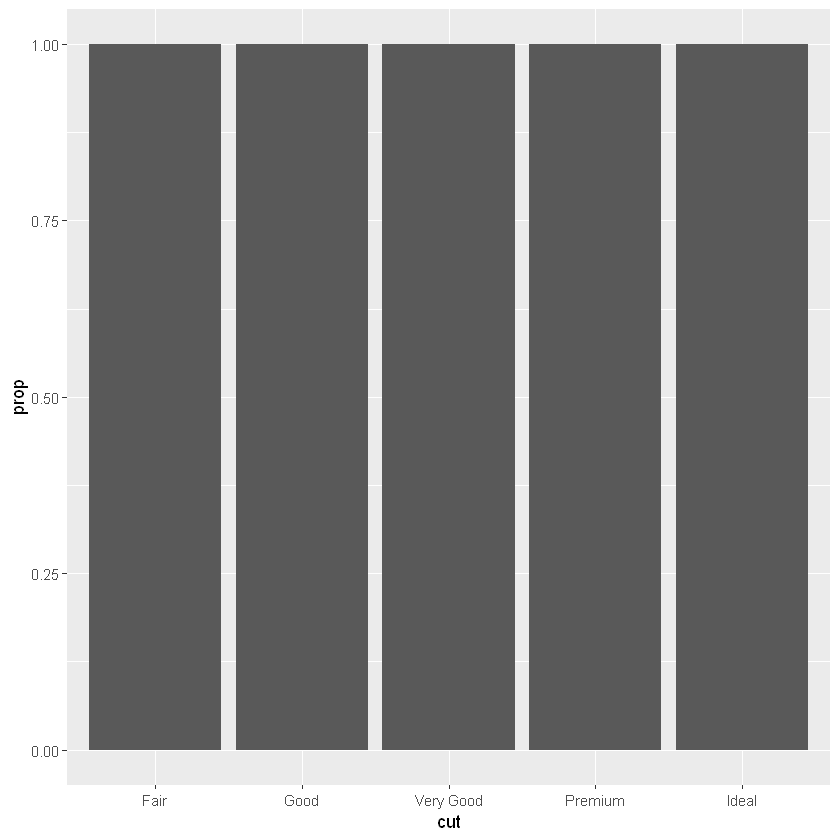

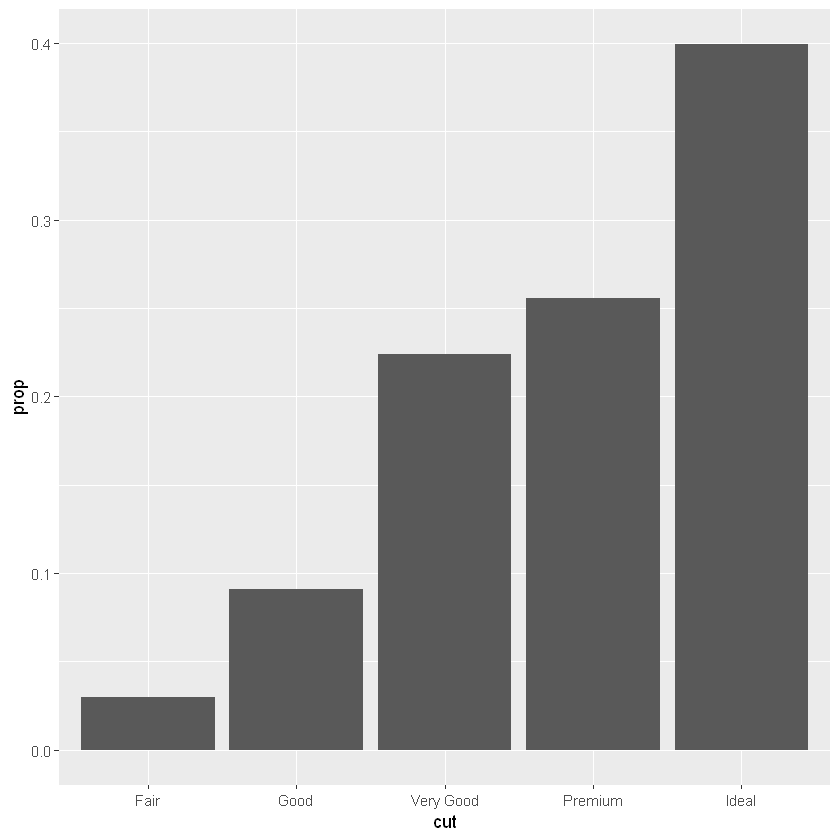

In [32]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop..))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop..,group=1))

What is the problem with this plot? _Its hard to clearly see where the mass of the data is because some points are overlapping._
How could you improve it? By using geom_jitter

ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point()

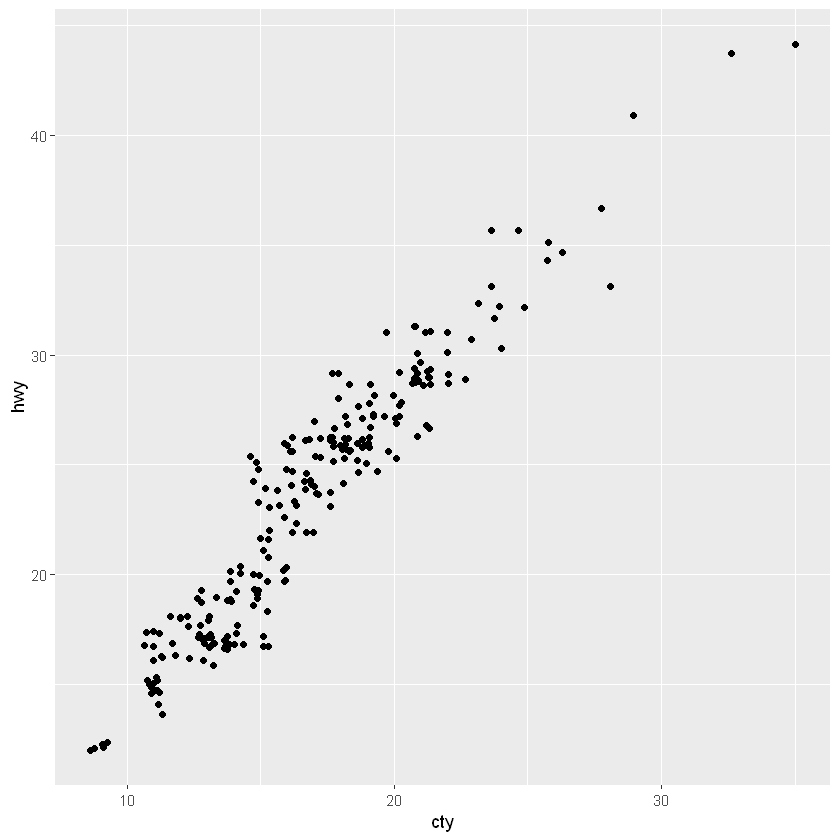

In [36]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_jitter()

What parameters to geom_jitter() control the amount of jittering?  
Width: & Height - Determine the amount of vertical and horizontal distance between the points.  

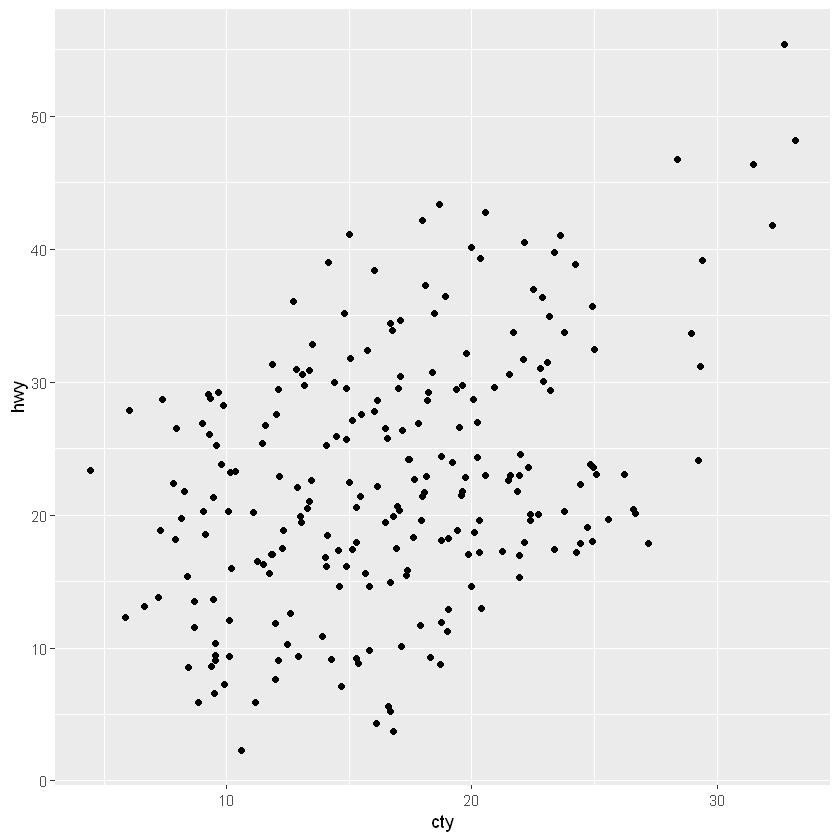

In [42]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_jitter(width=2, height=3)

Compare and contrast   
geom_jitter(): _makes all the points visible and the same size_  
geom_count(): _Increases the size of the points where there are overlapping points_ And the size = number of observations at position

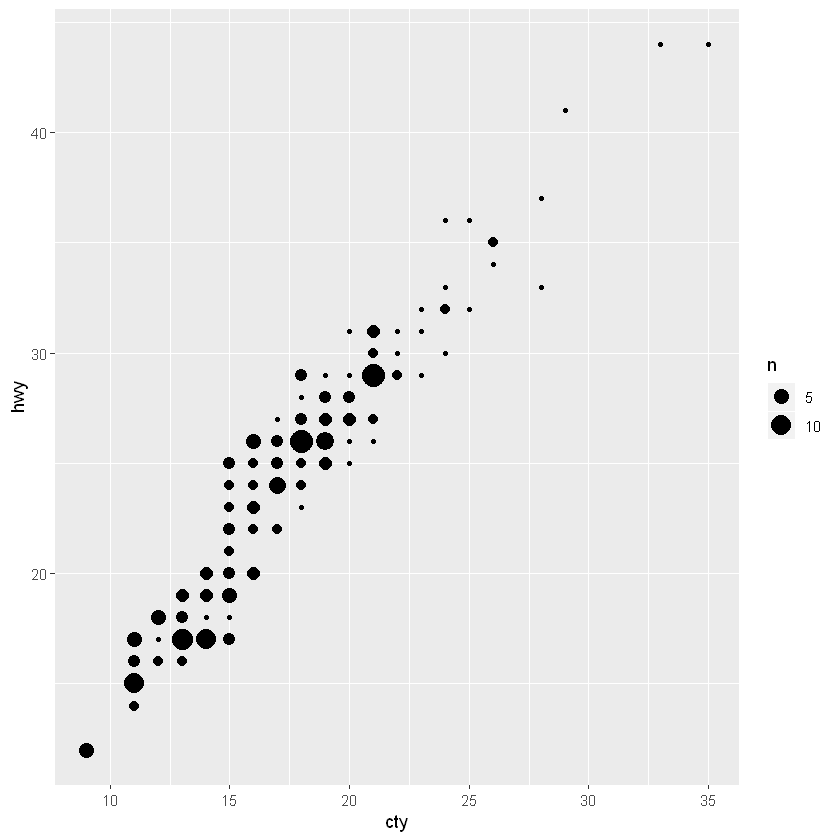

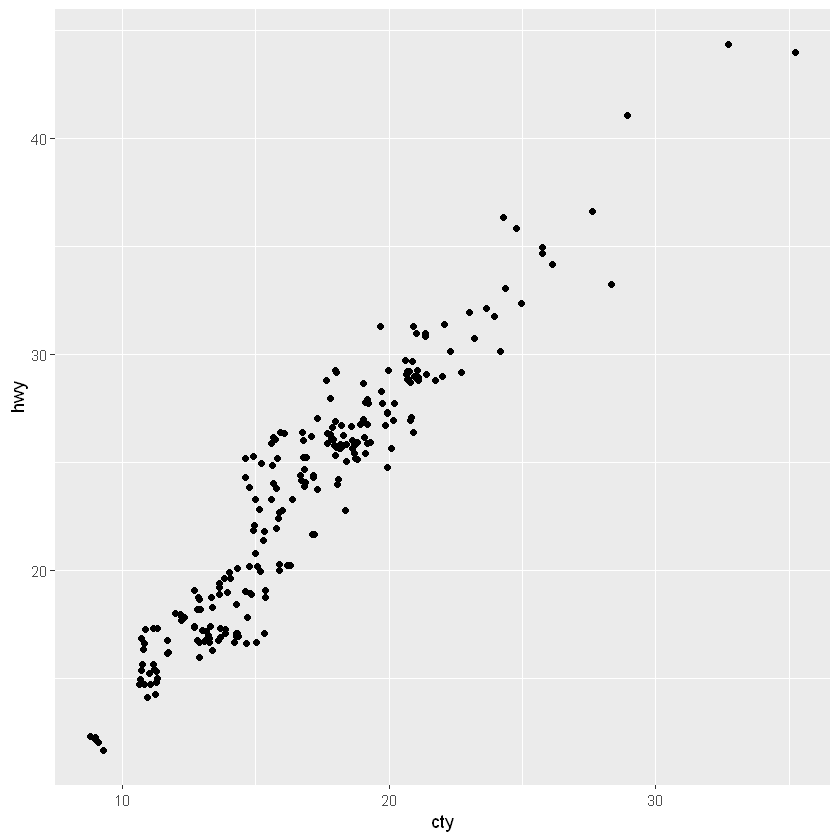

In [45]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_count()
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_jitter()

What’s the default position adjustment for geom_boxplot()? _The default positional adjustment is dodge or non-overlapping_  
Create a visualisation of the mpg dataset that demonstrates it.

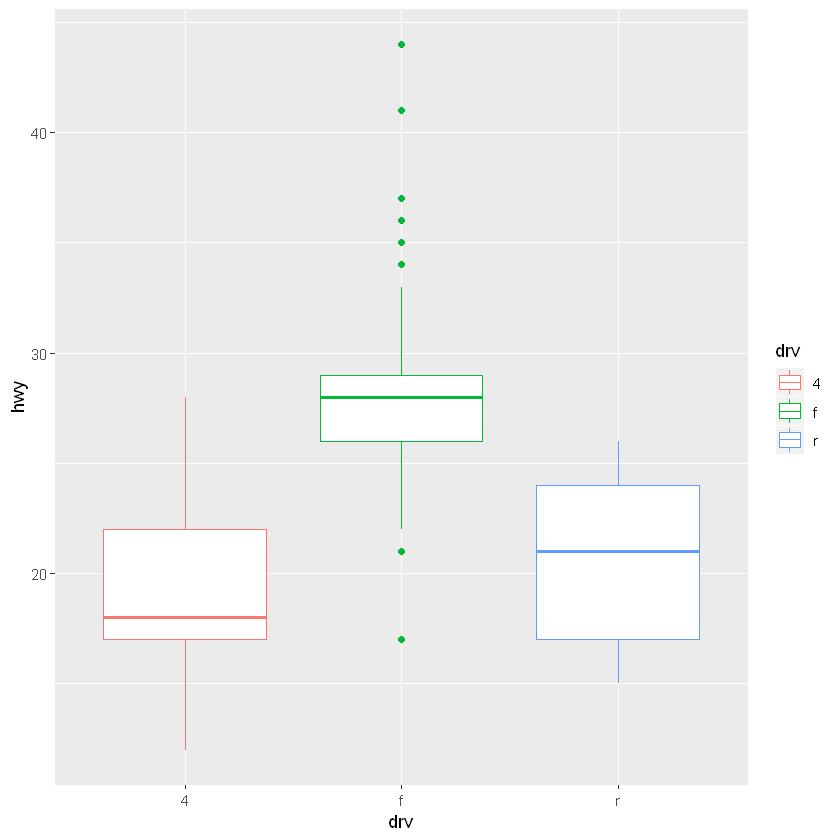

In [49]:
ggplot(data = mpg, mapping = aes(x = drv, y = hwy, color = drv)) +
  geom_boxplot(position="dodge")

Turn a stacked bar chart into a pie chart using coord_polar()

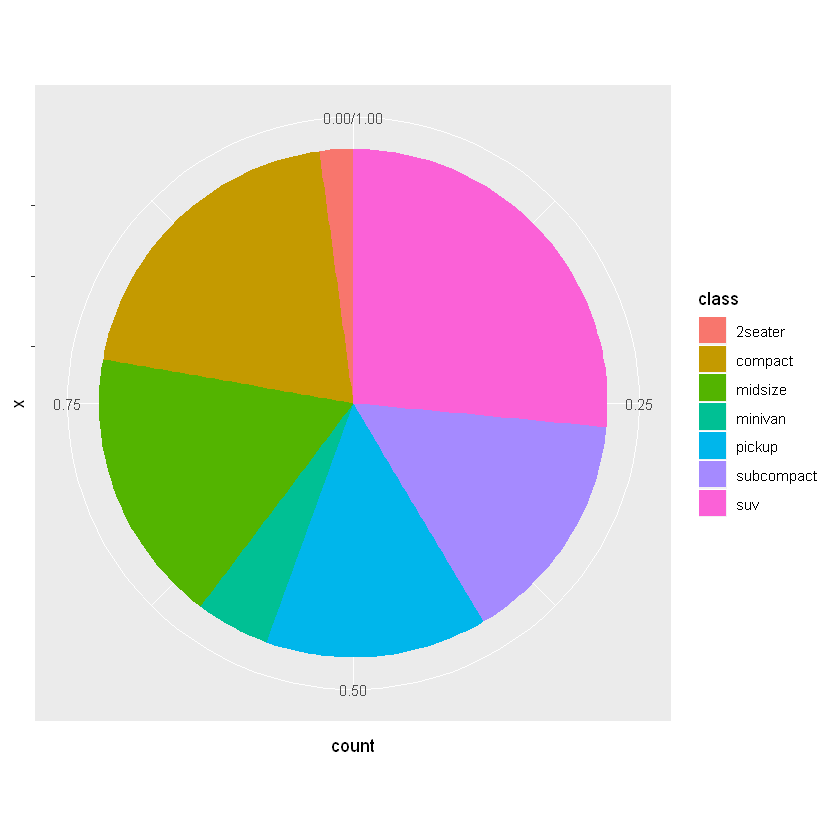

In [4]:
ggplot(mpg, aes(x = 1, fill = class))+
  geom_bar(position = "fill") +
  coord_polar(theta = "y") + 
  scale_x_continuous(labels = NULL)

What does labs() do? _allows us to change labels for axis, plot, and legends_

In [51]:
?labs

What’s the difference between coord_quickmap() - sets the aspect ratio correctly for maps especially for spatial data with ggplot2
and coord_map() projects a portion of the earth onto a flat 2D plane using any projection

What does the plot below tell you about the relationship between city and highway mpg? It's a positive linear relationship for every increase in hwy there is an increase in cty.  

coord_fixed() ensures that the ratios between the x and y axis stay at a specified relationship (default: 1). This is important for easily seeing the magnitude of the relationship between variables.  

geom_abline() adds a line with a given intercept and slope (either given by aes or by intercept and slope args)


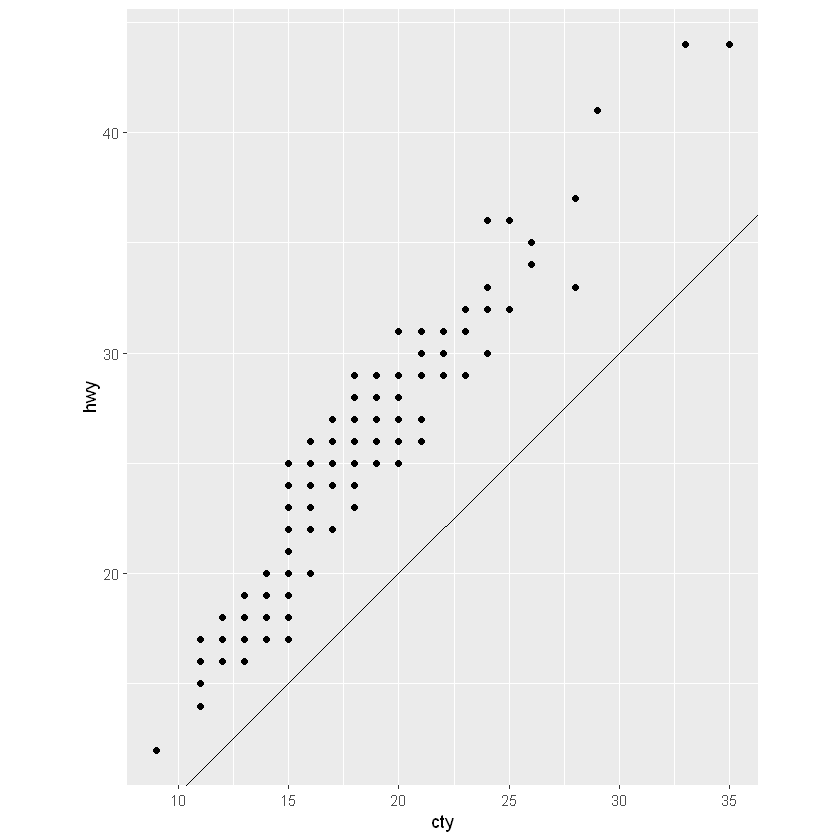

In [52]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() + 
  geom_abline() +
  coord_fixed()